# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [ ]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjwal1/bert

# Models

## Setup

In [ ]:
import torch.nn as nn
import torch.optim as optim

import gc

In [ ]:
TRAIN_classes = 'two-classes'

base_data_config = {
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : -1,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 256,
}

base_train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "loss_fn" : nn.CrossEntropyLoss,
}

base_num_epochs = 2

In [ ]:
configs = list()

for data_unit in [sup.DATA_S_PF, sup.DATA_S_PV]:
  for PH2 in [False, True]:
    for loadable in [bert.BERT_TINY, bert.DISTILBERT]:
    

      data_config = base_data_config.copy()
      train_config = base_train_config.copy()

      data_config["data_unit"] = data_unit
      if data_unit == sup.DATA_S_PF:
        data_config["seq_len"] = 1
        data_unit_multiplier = 1
      else:
        data_config["seq_len"] = 12
        data_unit_multiplier = 10

      data_config["PH2"] = PH2
      if PH2:
        data_config["input_dim"] = 87
      else:
        data_config["input_dim"] = 72

      train_config["loadable"] = loadable
      if loadable == bert.BERT_TINY:
        loadable_multiplier = 5
      else:
        loadable_multiplier = 1

      train_config["num_epochs"] = base_num_epochs \
                                    * data_unit_multiplier \
                                    * loadable_multiplier
      
      configs.append((data_config, train_config))



In [4]:
TRAIN_classes = 'alpha-classes'
data_unit = sup.DATA_S_PV
bert_loadable = bert.BERT_TINY

data_config_w2 = {
  "PH2" : True,
  "PH3" : False,
  "reducer": '',
  "kernel": '',
  "n": -1,
  "data_unit": data_unit,
  "label_col": sup.class_numeric_column,
  "class_list": TRAIN_classes,
  "batch_size": 256,
  "seq_len": 12,
  "input_dim": 87
}

data_config_wo2 = {
  "PH2" : False,
  "PH3" : False,
  "reducer": '',
  "kernel": '',
  "n": -1,
  "data_unit": data_unit,
  "label_col": sup.class_numeric_column,
  "class_list": TRAIN_classes,
  "batch_size": 256,
  "seq_len": 12,
  "input_dim": 72
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert_loadable,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 10000
}

In [5]:
w2_model = bert.BERT(data_config=data_config_w2, df=None, 
              train_config=train_config)

wo2_model = bert.BERT(data_config=data_config_wo2, df=None, 
              train_config=train_config)

## Train

In [ ]:
sup.bert_score_tracker = []

In [ ]:
for data_config, train_config in configs:
  print(data_config)
  print(train_config)
  model = bert.BERT(data_config=data_config, df=None, 
                    train_config=train_config)
  
  model.fit(verbose=True)

  model.score()
  print(model.accuracy)
  model.show_loss()

  model.keep()
  bert.keep_scores_bert(model)

  print("clearing memory...")
  del model
  gc.collect()

In [6]:
w2_model.fit(verbose=True)

In [7]:
wo2_model.fit(verbose=True)

## Evaluate

In [8]:
w2_model.score()

In [9]:
wo2_model.score()

In [10]:
w2_model.accuracy

0.7694915254237288

In [11]:
wo2_model.accuracy

0.9152542372881356

## Plot loss

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


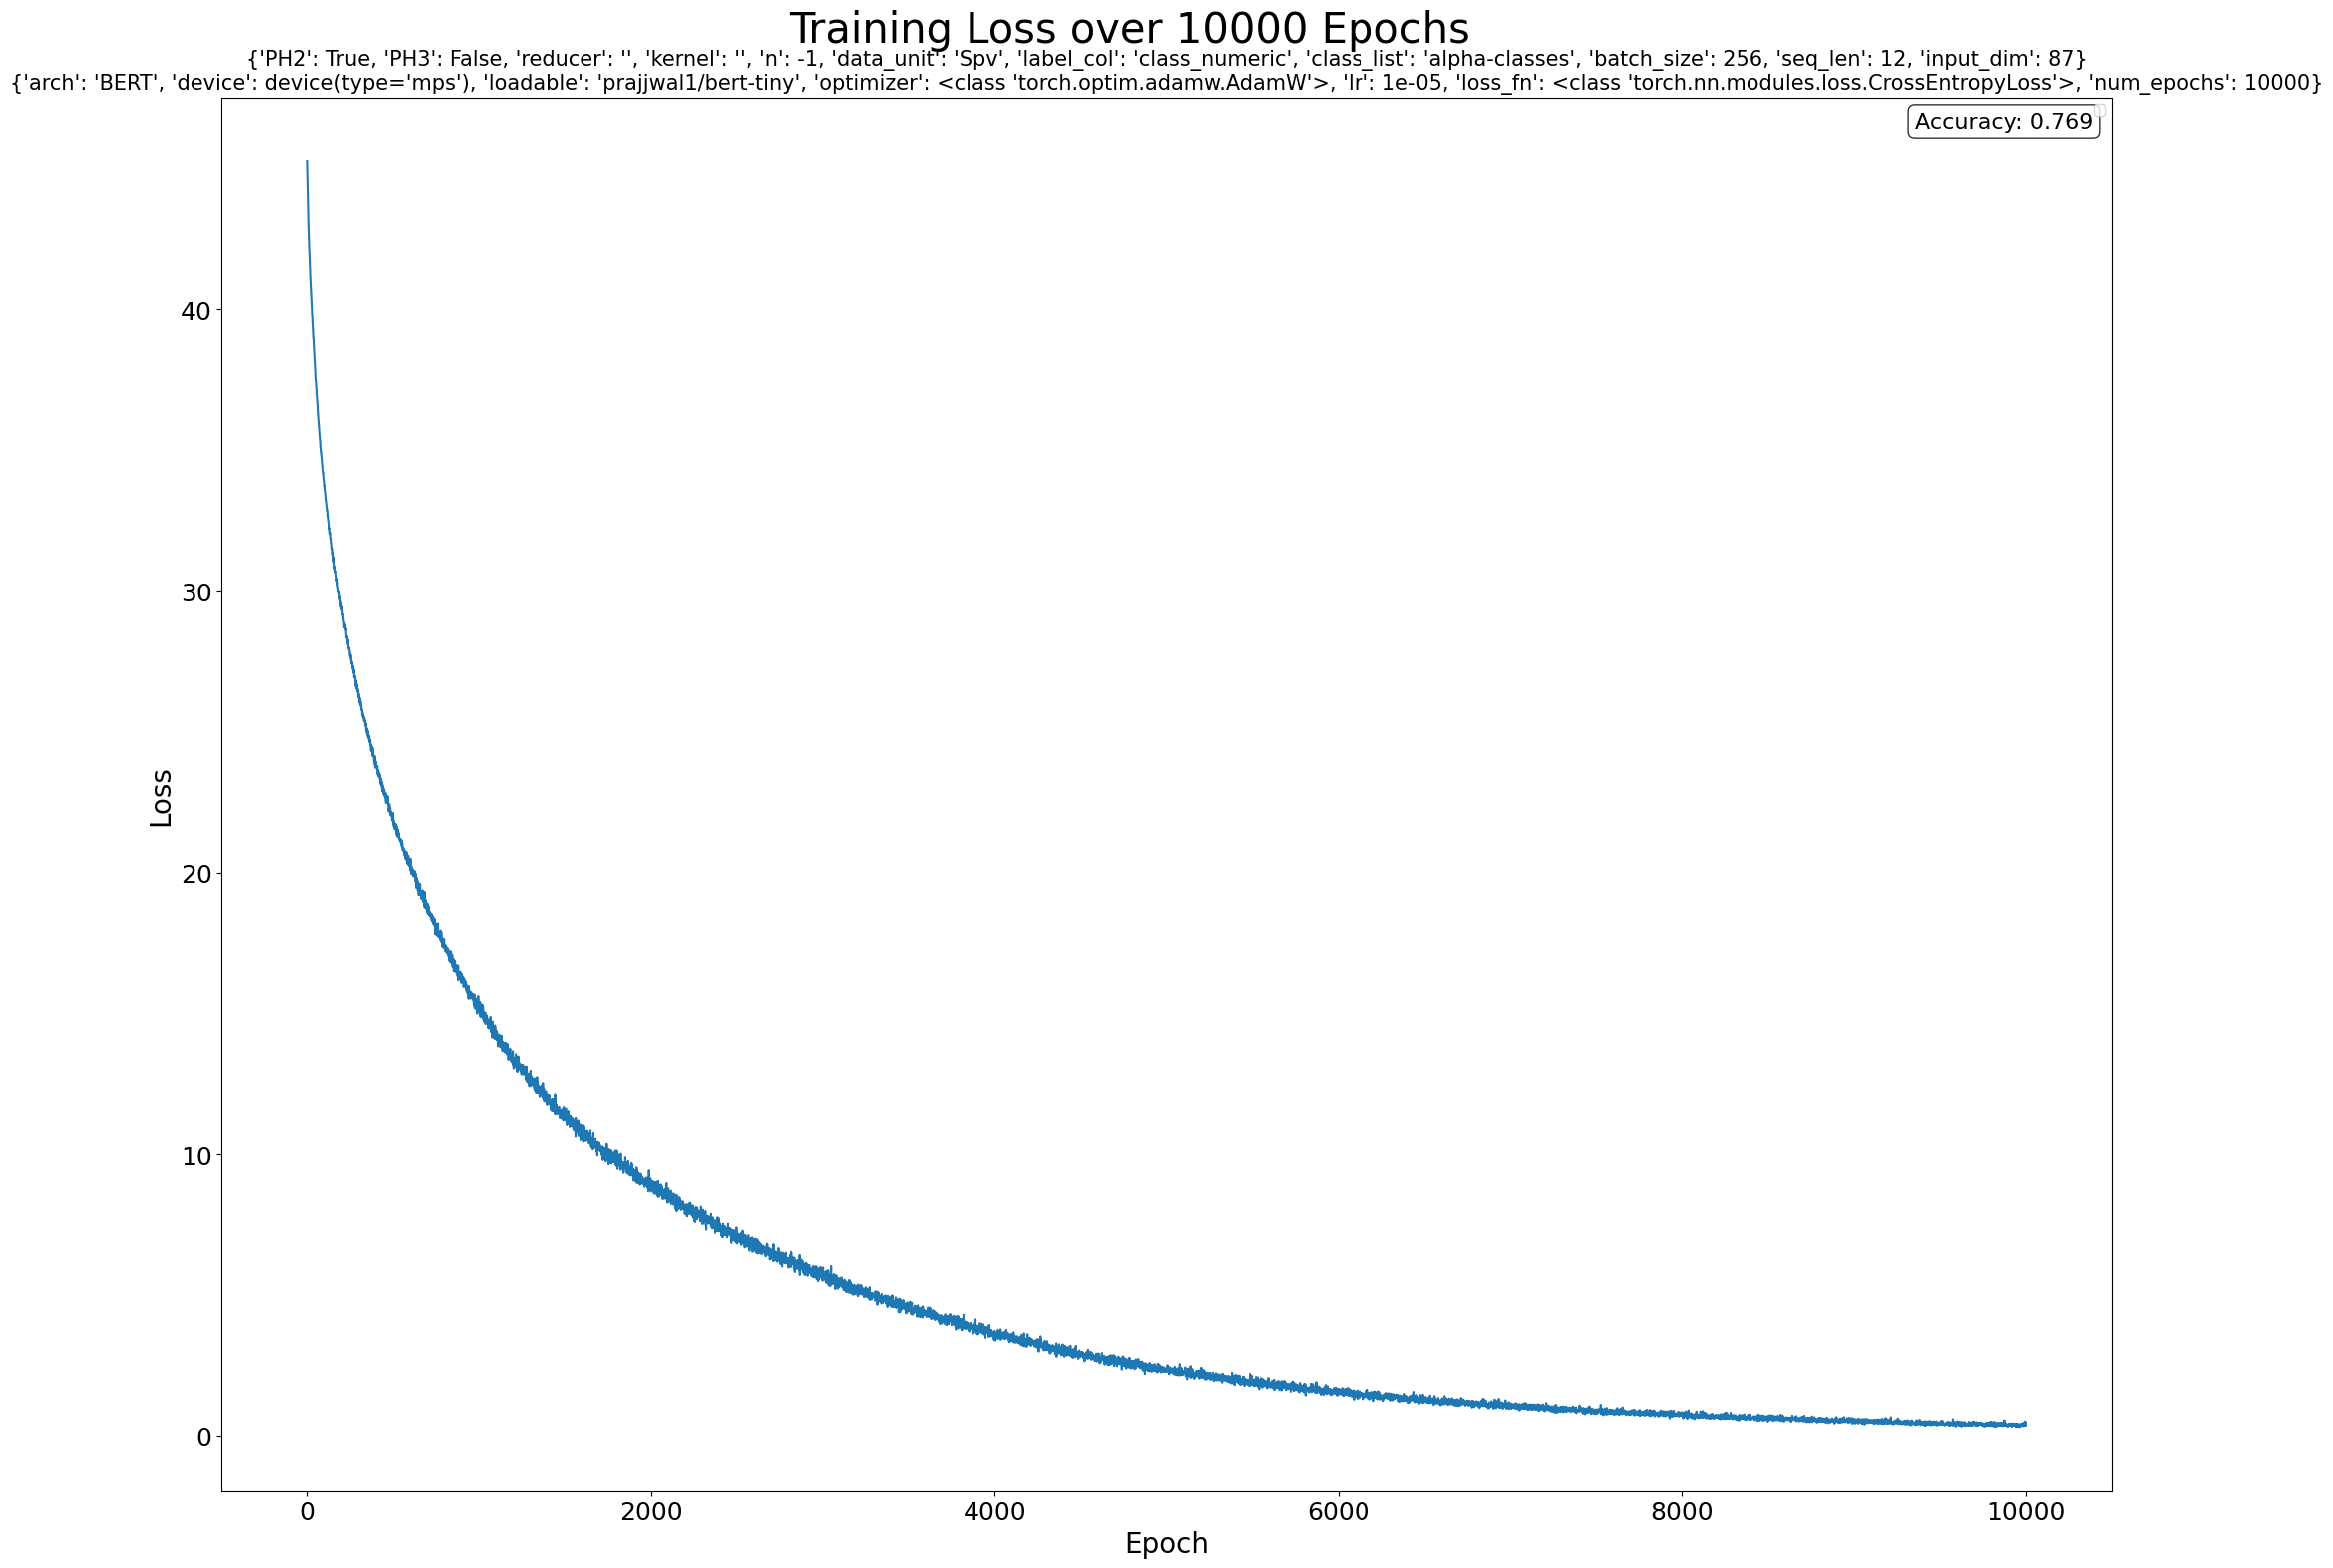

In [12]:
w2_model.show_loss()

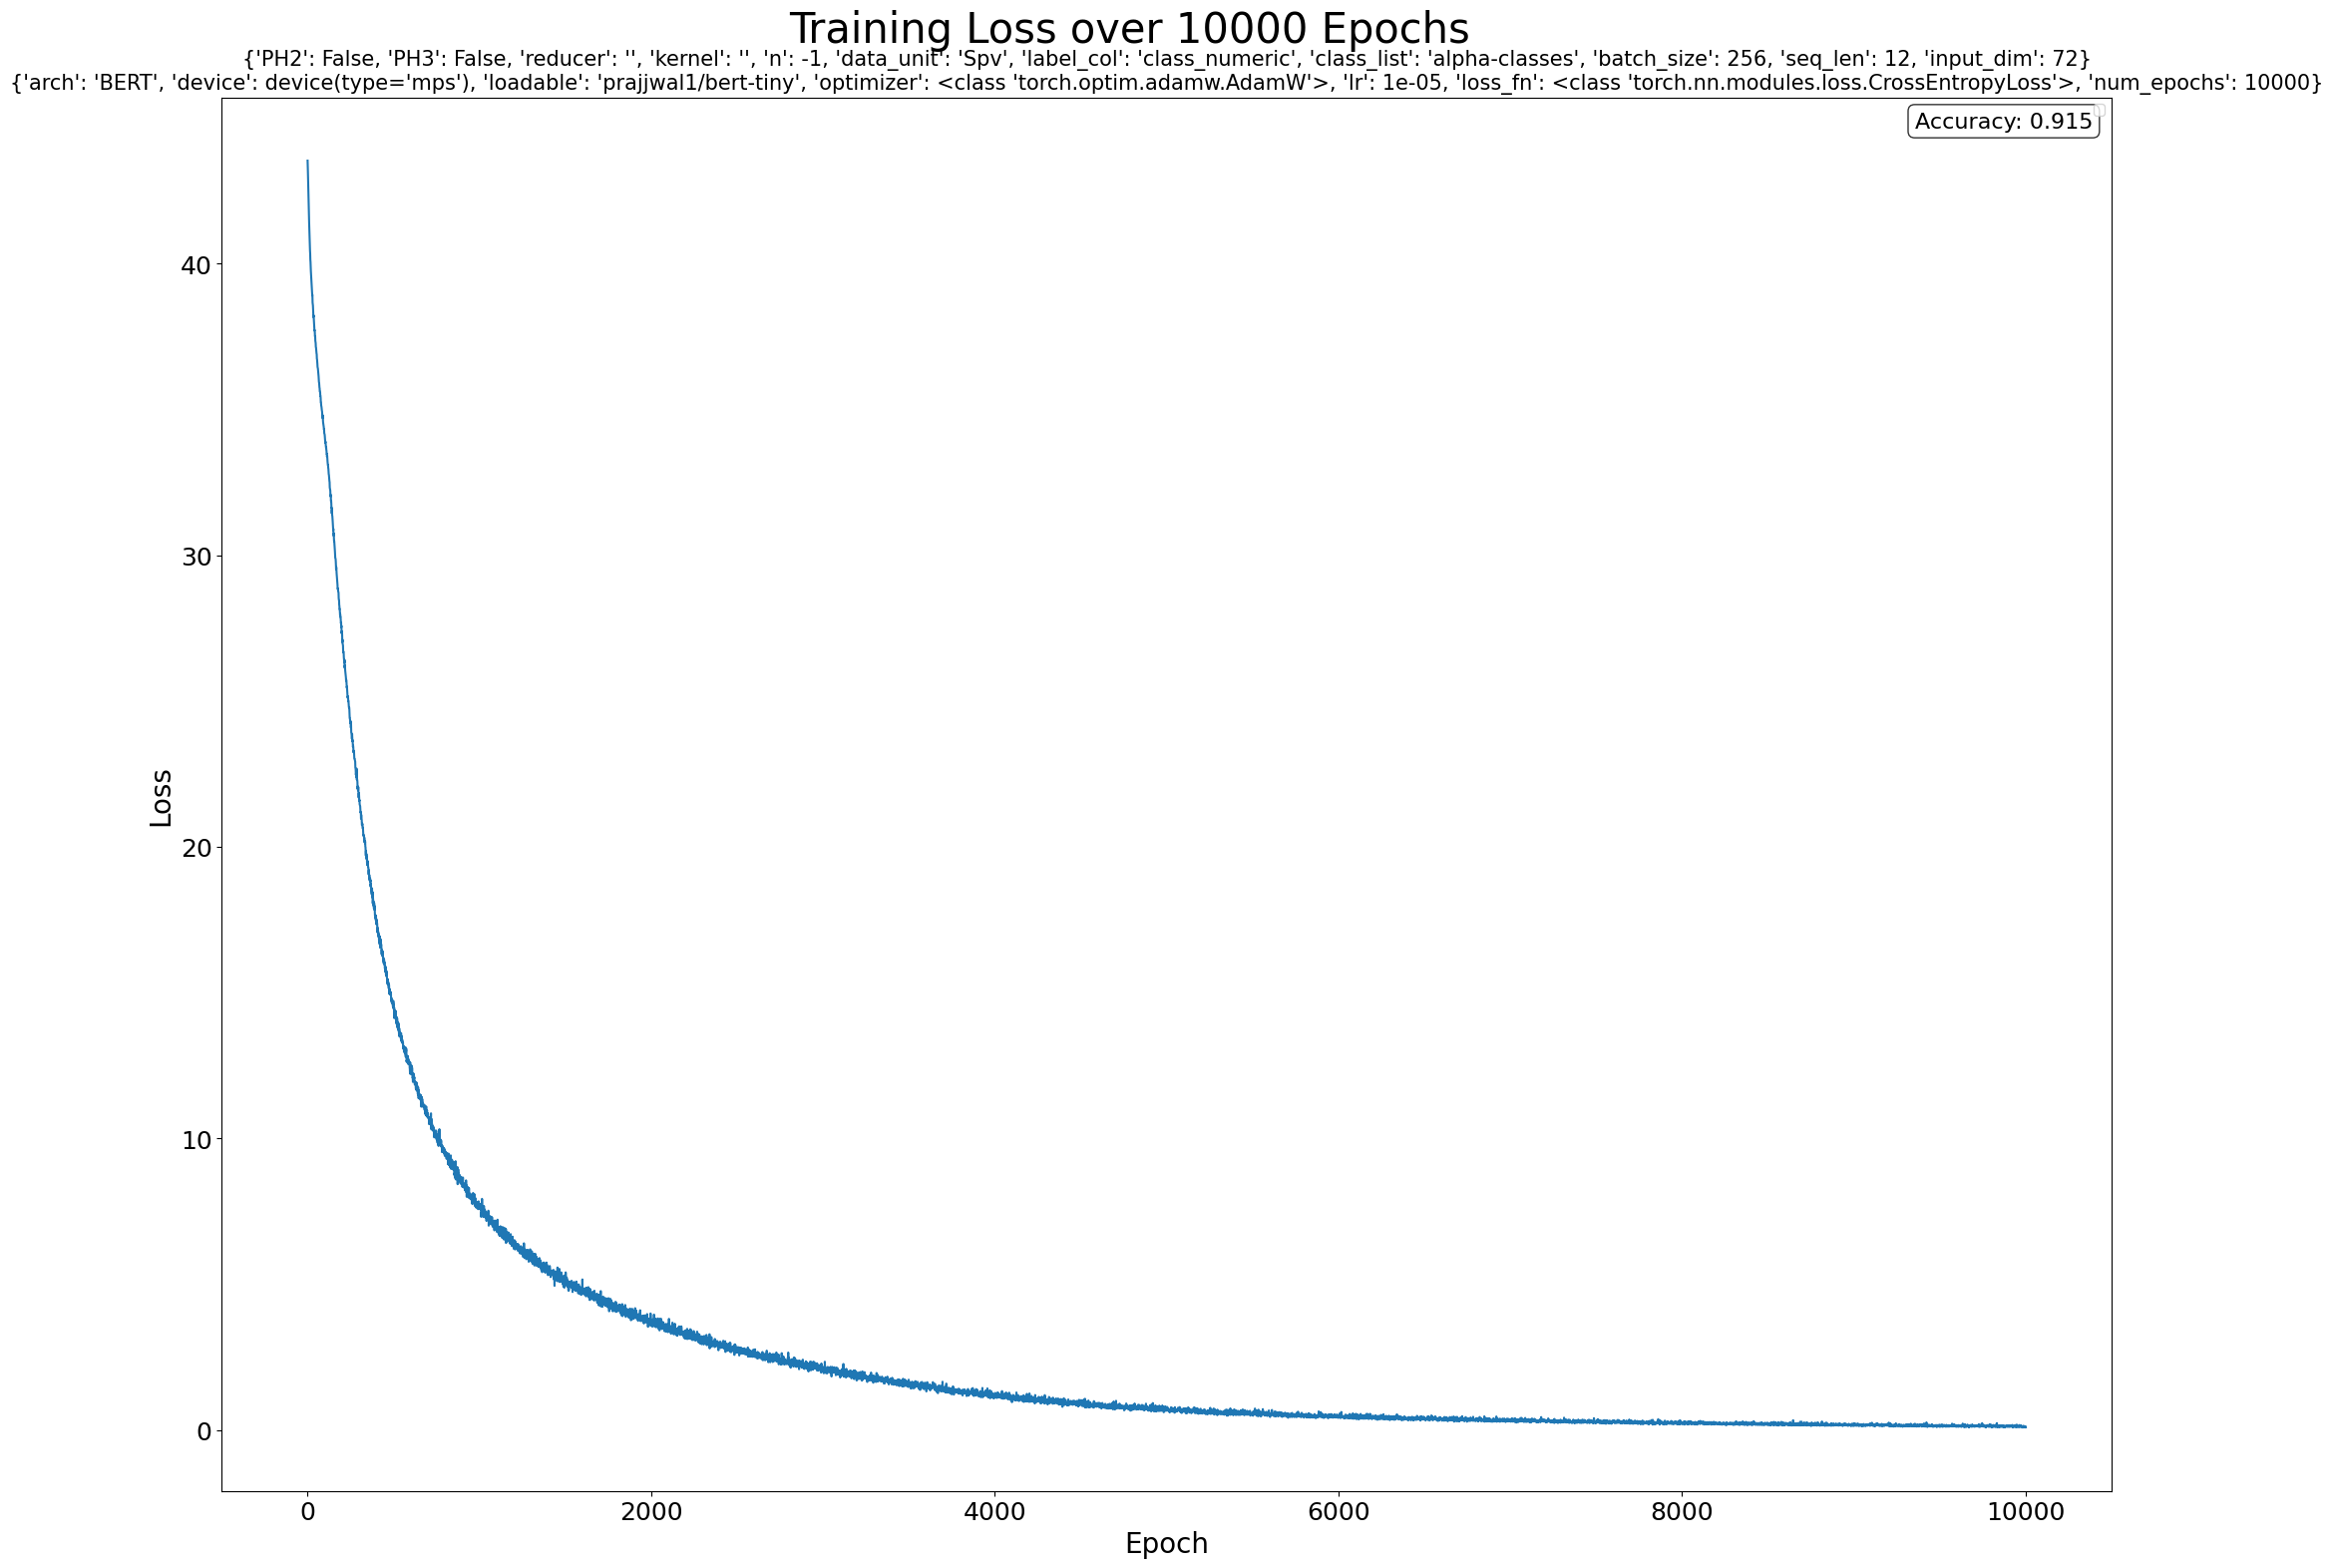

In [13]:
wo2_model.show_loss()

## Save

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


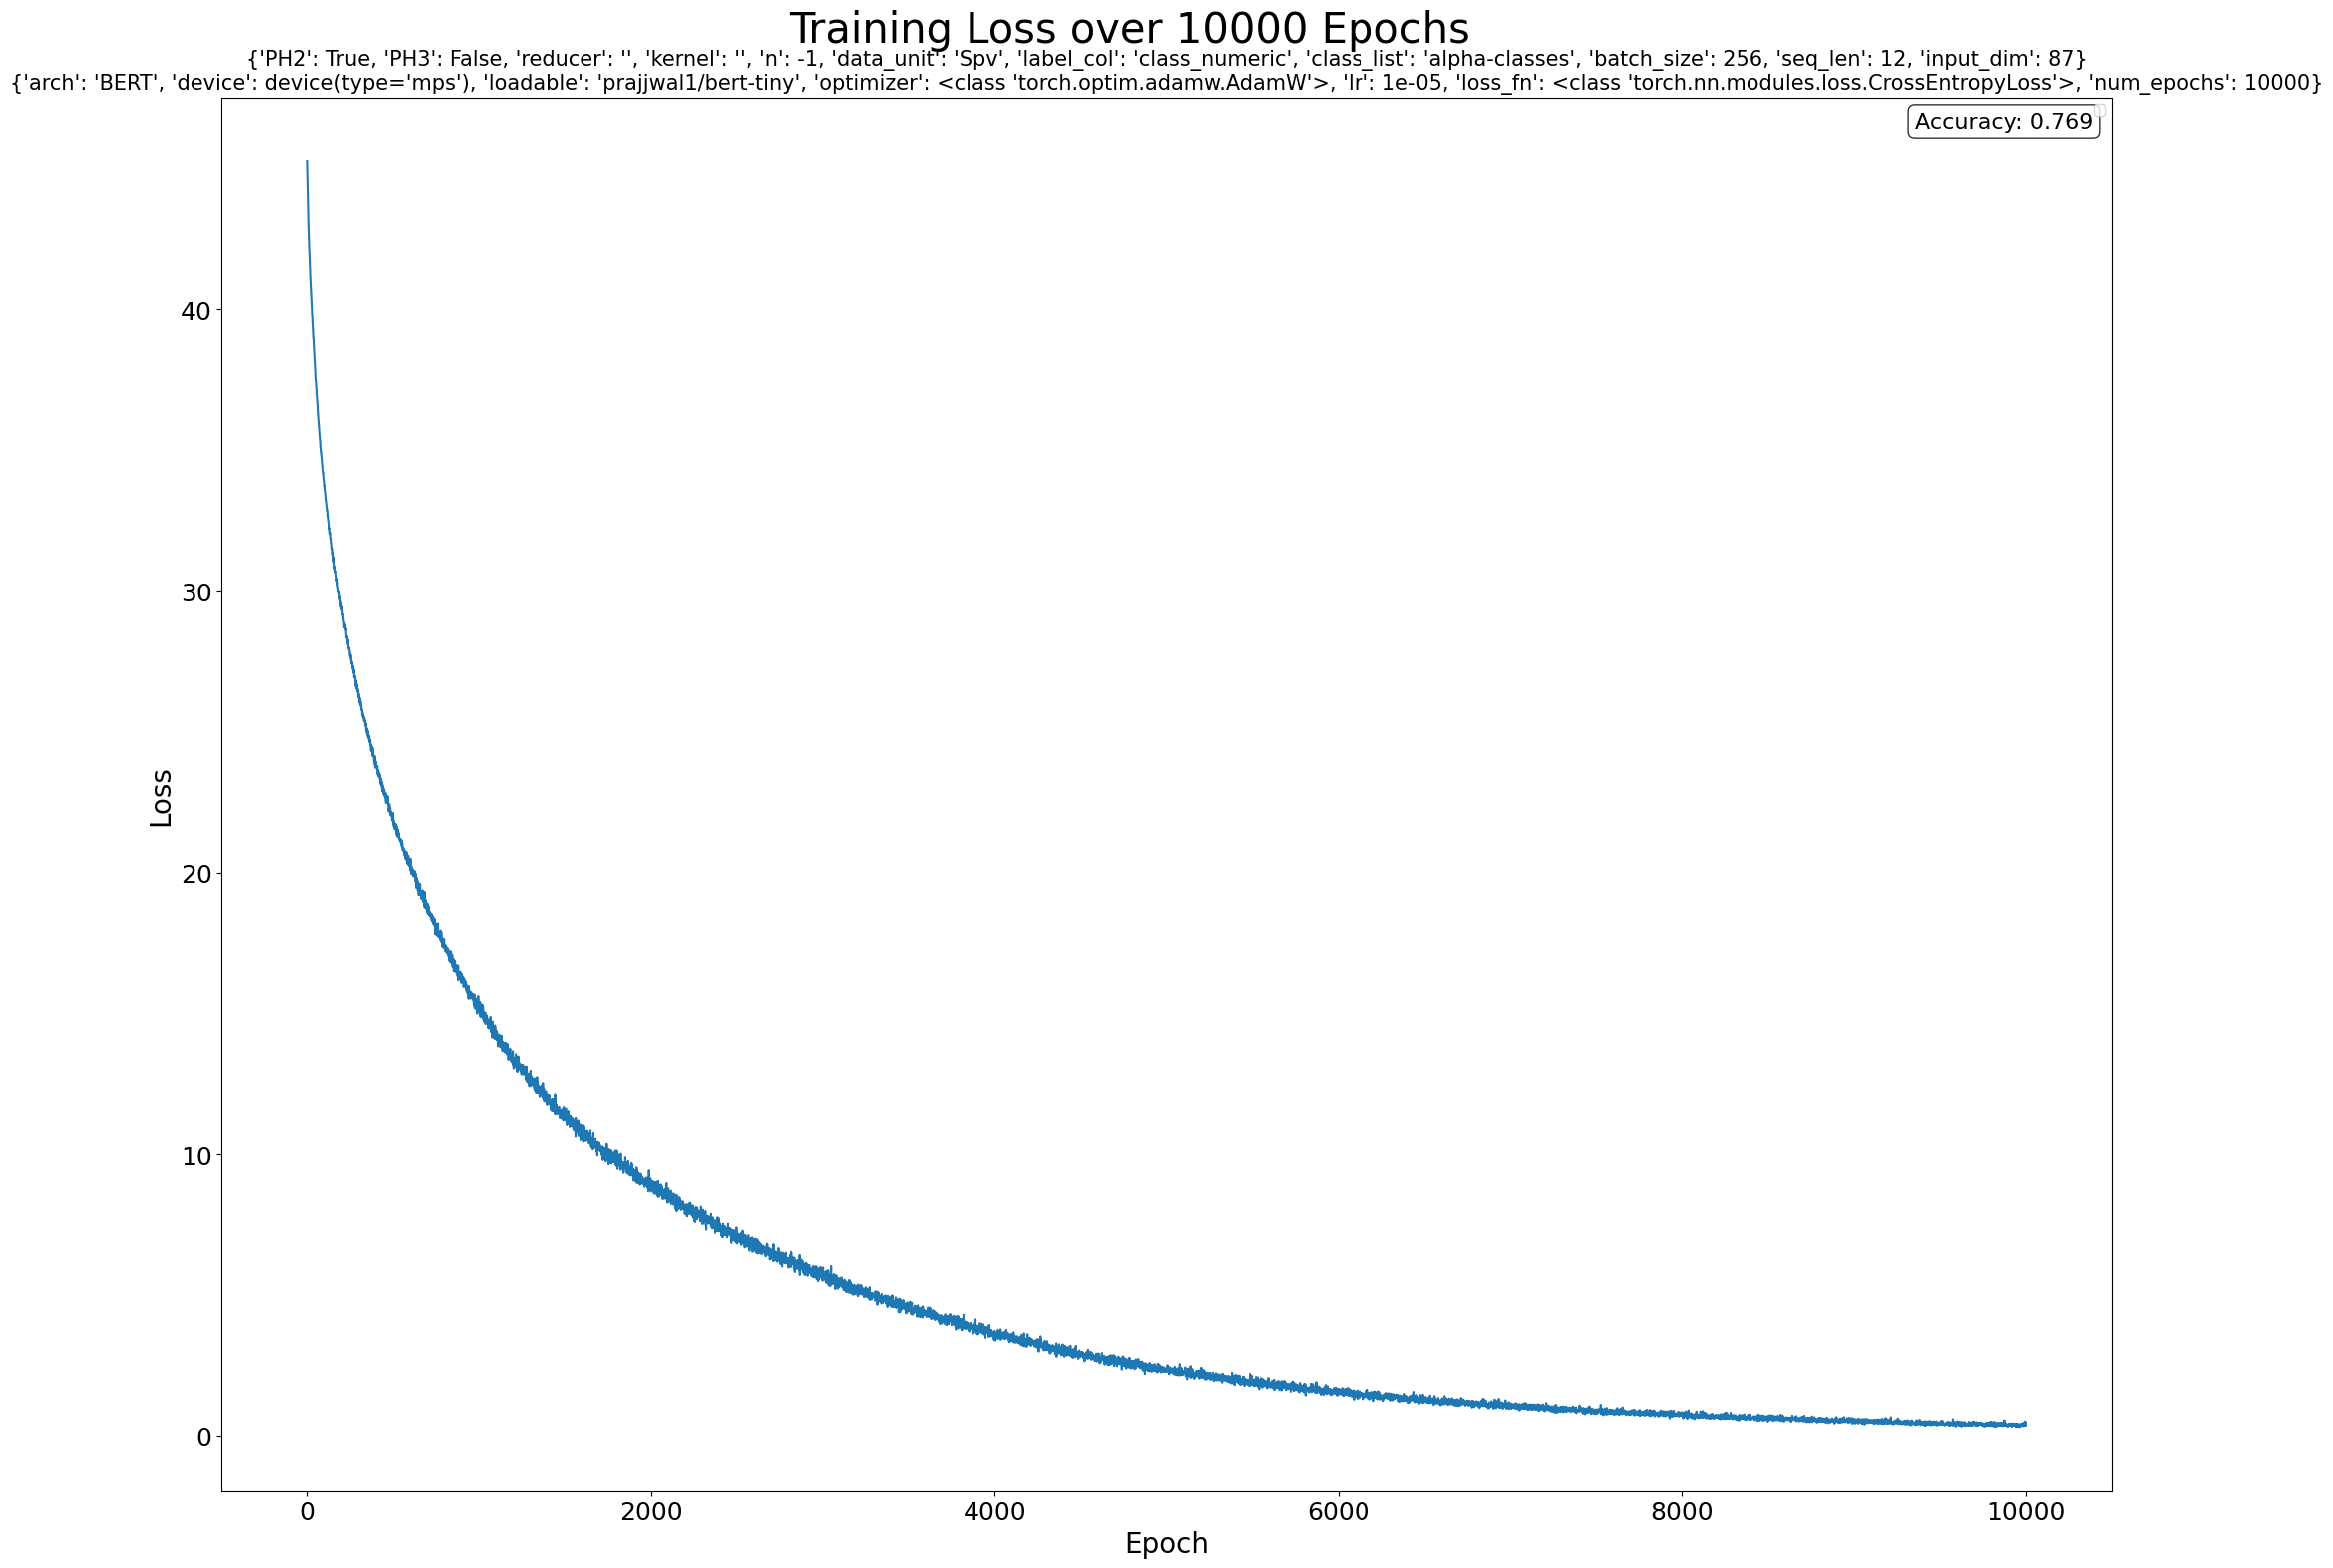

In [14]:
w2_model.keep()

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


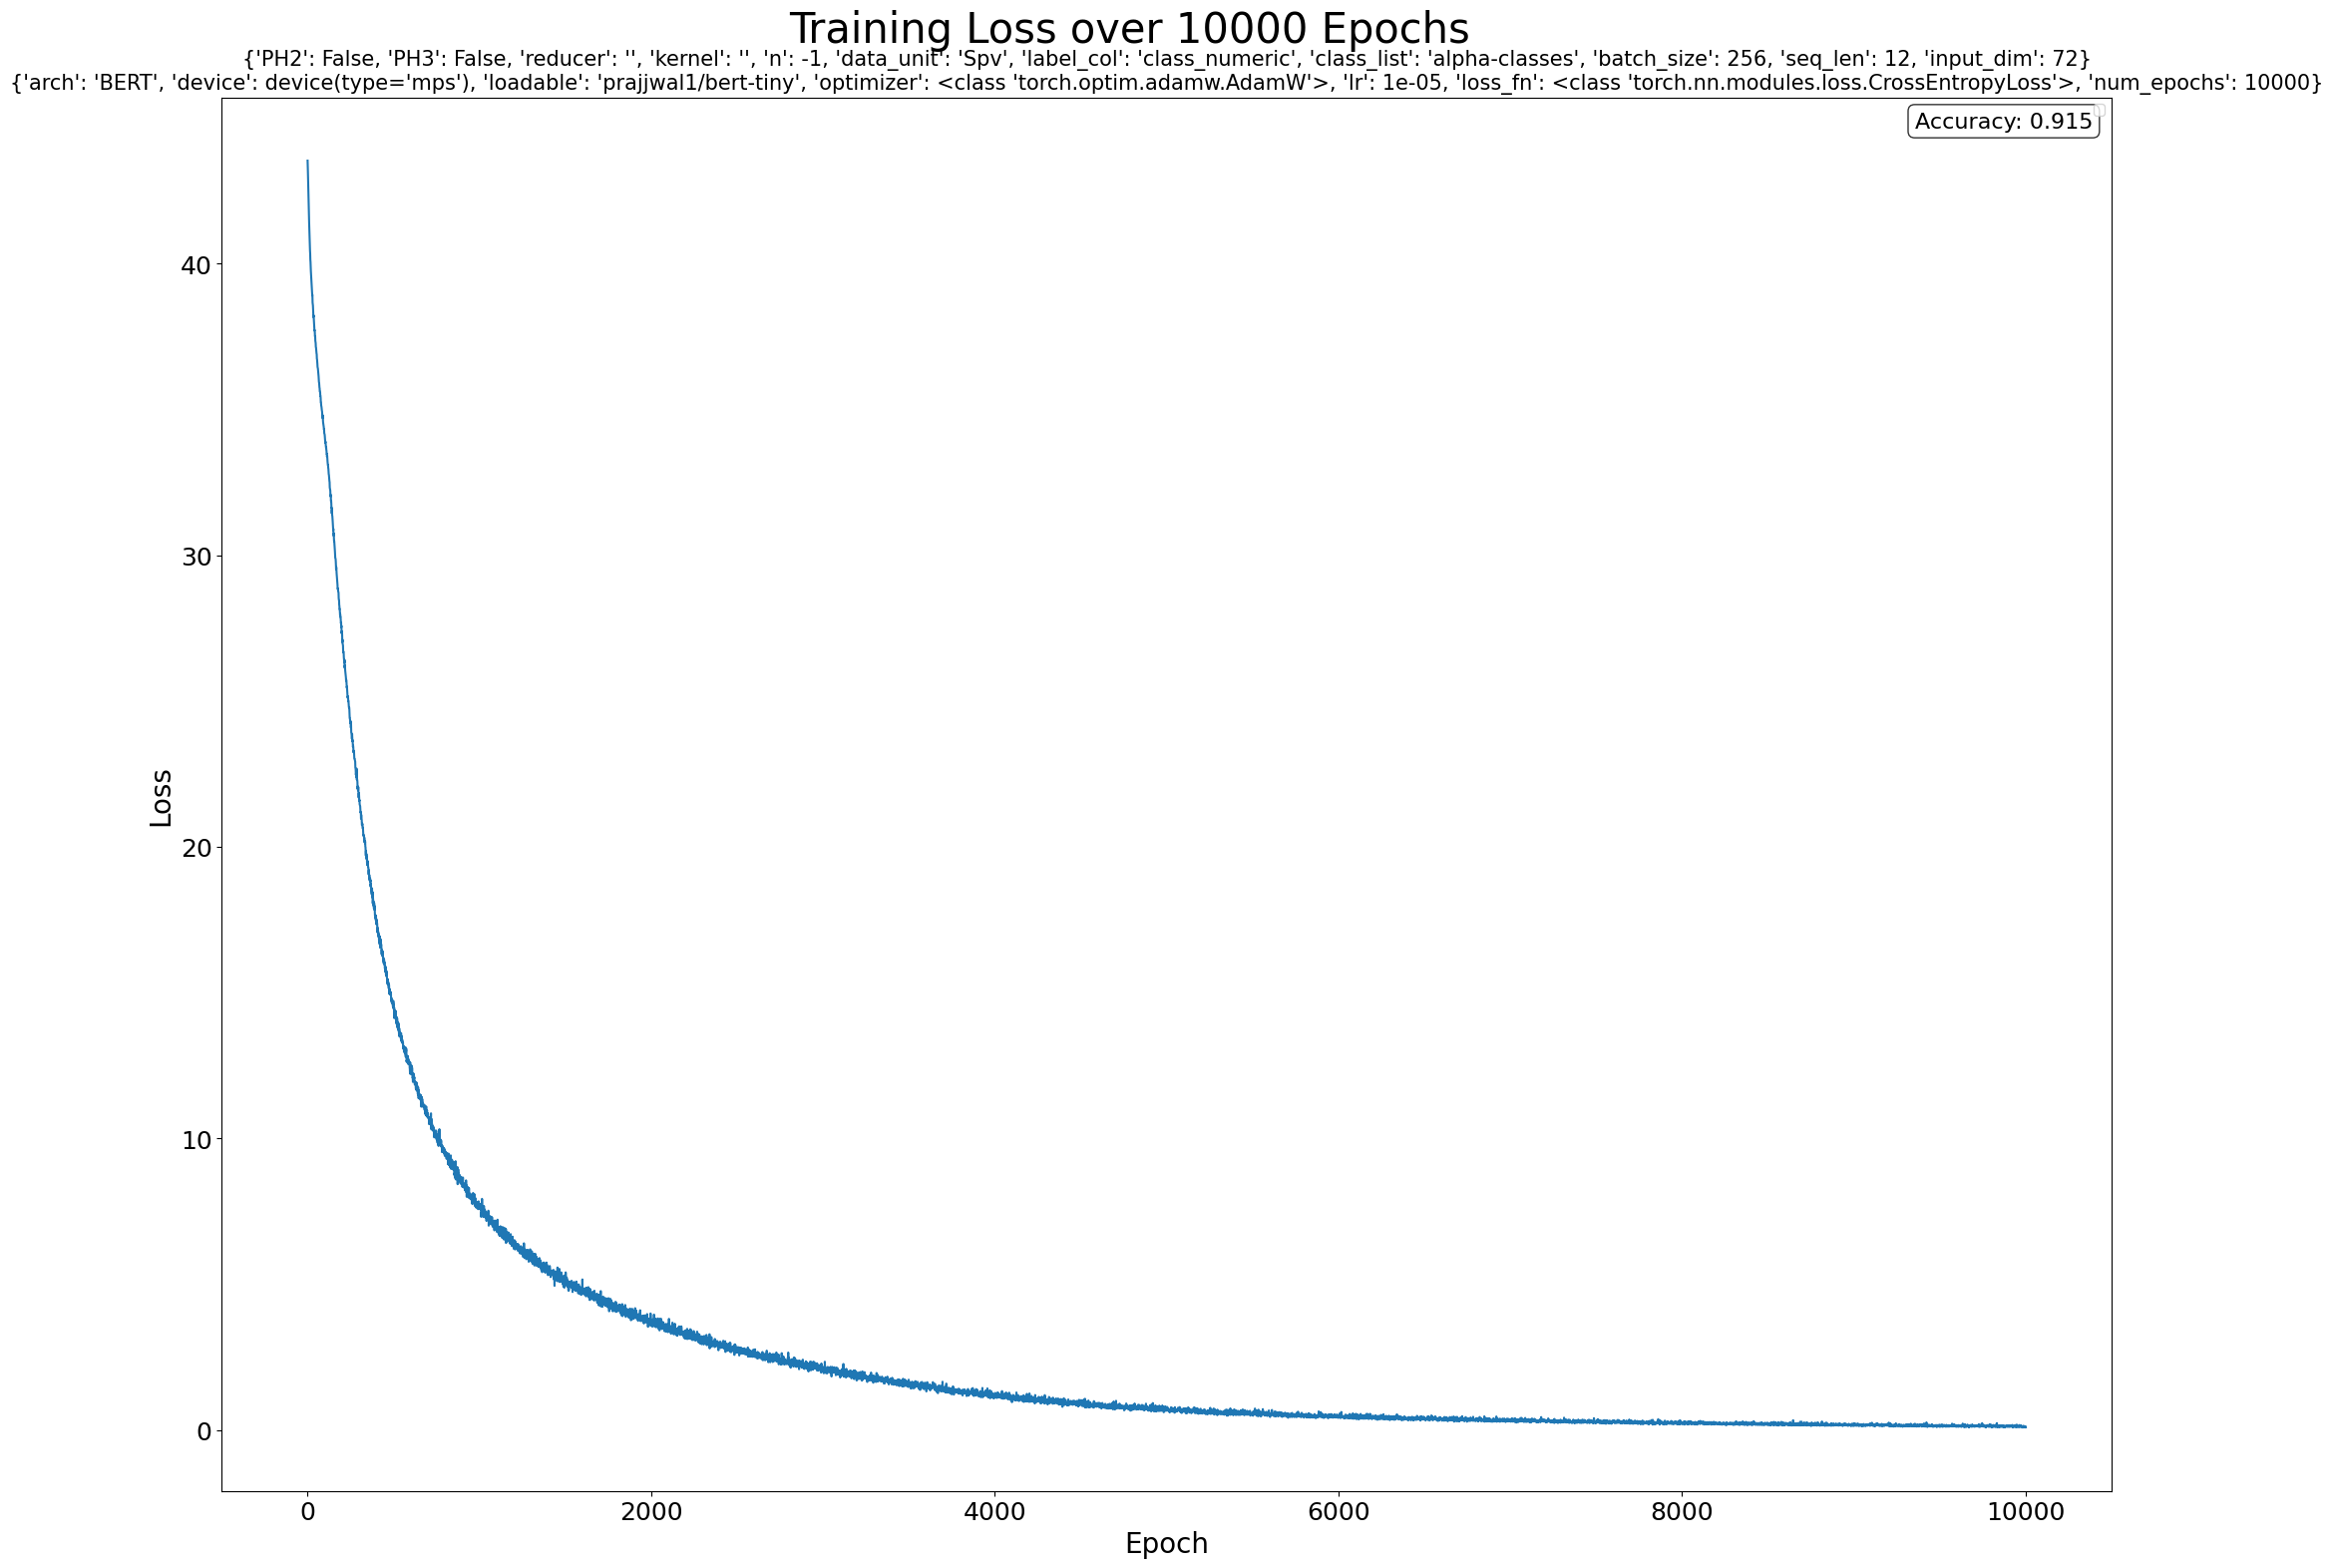

In [15]:
wo2_model.keep()